# **Analisis Hubungan Antara CO dan NO2 pada Data Kualitas Udara Dengan Menggunakan Clustering KMeans**


---


---



# **Import Library dan Load Dataset**

In [9]:
%pip install seaborn
%pip install matplotlib


[notice] A new release of pip available: 22.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Import Libraries
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

**Import Libraries**

---
*   `pandas as pd`: Mengimpor pustaka pandas dengan alias pd, yang digunakan untuk manipulasi dan analisis data dalam bentuk DataFrame.
*   `seaborn as sns`: Mengimpor pustaka seaborn dengan alias sns, yang digunakan untuk visualisasi data.
*   `from sklearn.cluster import KMeans`: Mengimpor kelas KMeans untuk melakukan clustering menggunakan algoritma K-Means.
*   `from sklearn.preprocessing import StandardScaler`: Mengimpor kelas StandardScaler untuk menstandarisasi fitur dengan menghapus mean dan menskalakan ke unit variance.
*   `from sklearn.metrics import silhouette_score, davies_bouldin_score`: Mengimpor metrik untuk mengevaluasi kualitas clustering.
*   `matplotlib.pyplot as plt`: Mengimpor modul pyplot dari matplotlib dengan alias plt untuk membuat plot dan grafik.









In [11]:
# Load Dataset
data = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Load Dataset**

---

*   `data = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')`:
      Digunakan untuk membaca file CSV yang berisi data kualitas udara, yang terpisah oleh titik koma (;) dan menggunakan koma (,) sebagai pemisah desimal. Data ini kemudian disimpan dalam DataFrame data.

---

Selanjutnya, berikut adalah penjelasan setiap fitur atau kolom pada dataset diatas:

**Date**: Tanggal pengukuran dalam format DD/MM/YYYY.

**Time**: Waktu pengukuran dalam format HH.MM.SS (jam, menit, detik).

**CO(GT)**: Konsentrasi Karbon Monoksida dalam udara, diukur dalam miligram per meter kubik (mg/m^3) oleh perangkat Gas Sensor (GT).

**PT08.S1(CO)**: Respon dari sensor pertama untuk CO, yang direpresentasikan dalam unit arbitrer.

**NMHC(GT)**: Konsentrasi Non-Methane Hydrocarbons, diukur dalam mikrogram per meter kubik (μg/m^3) oleh perangkat Gas Sensor (GT).

**C6H6(GT)**: Konsentrasi Benzena, diukur dalam mikrogram per meter kubik (μg/m^3).

**PT08.S2(NMHC)**: Respon dari sensor kedua untuk NMHC, yang direpresentasikan dalam unit arbitrer.

**NOx(GT)**: Konsentrasi Nitrogen Oksida (NOx), diukur dalam part per billion (ppb) oleh perangkat Gas Sensor (GT).

**PT08.S3(NOx)**: Respon dari sensor ketiga untuk NOx, yang direpresentasikan dalam unit arbitrer.

**NO2(GT)**: Konsentrasi Nitrogen Dioksida (NO2), diukur dalam mikrogram per meter kubik (μg/m^3) oleh perangkat Gas Sensor (GT).

**PT08.S4(NO2)**: Respon dari sensor keempat untuk NO2, yang direpresentasikan dalam unit arbitrer.

**PT08.S5(O3)**: Respon dari sensor kelima untuk Ozon (O3), yang direpresentasikan dalam unit arbitrer.

**T**: Temperatur lingkungan dalam derajat Celsius (°C).
RH: Kelembaban relatif (Relative Humidity) dalam persen (%).

**AH**: Kelembapan absolut (dalam g/m³).

**Unnamed: 15**: Kolom tanpa nama, mungkin mengandung data yang tidak relevan atau hilang.

**Unnamed: 16**: Kolom tanpa nama, mungkin mengandung data yang tidak relevan atau hilang.

# **Summary Dataset**

In [12]:
# Menampilkan Informasi Dasar Mengenai Dataset
print(data.info())

# Menampilkan Statistik Deskriptif Dataset
print(data.describe())

# Menampilkan Data Head Dari Dataset
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

**Summary Dataset**

---
*   `data.info()`: Perintah ini menampilkan informasi dasar mengenai DataFrame data. Informasi yang ditampilkan mencakup jumlah entri (baris), nama kolom, jumlah nilai non-null dalam setiap kolom, dan tipe data dari masing-masing kolom. Ini berguna untuk memahami struktur dan integritas data.
*   `data.describe()`: Perintah ini menampilkan statistik deskriptif dasar dari data numerik dalam DataFrame data. Statistik yang disertakan mencakup count (jumlah nilai), mean (rata-rata), std (standar deviasi), min (nilai minimum), 25% (kuartil pertama), 50% (median), 75% (kuartil ketiga), dan max (nilai maksimum). Statistik ini memberikan gambaran umum tentang distribusi nilai dalam kolom numerik.
*   `data.head()`: Perintah ini menampilkan lima baris pertama dari DataFrame data. Fungsi head() secara default menampilkan lima baris pertama, tetapi bisa juga menerima parameter untuk menampilkan sejumlah baris tertentu. Misalnya, data.head(10) akan menampilkan 10 baris pertama.


---


Dengan menampilkan informasi dasar dan statistik deskriptif, kita dapat memahami lebih baik bagaimana struktur data dan distribusi nilai dalam dataset. Ini membantu dalam mengidentifikasi masalah data seperti nilai yang hilang atau tipe data yang tidak sesuai.


# **Data Preprocessing**

In [13]:
# Menghilangkan Kolom yang Tidak Terpakai dan Konversi ke Numerik
data_cleaned = data.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'])
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')
data_cleaned

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Penjelasan**

---

*   `data.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'])`: Perintah ini menghapus kolom 'Date', 'Time', 'Unnamed: 15', dan 'Unnamed: 16' dari DataFrame data. Kolom-kolom ini dianggap tidak relevan untuk analisis yang akan dilakukan, sehingga dihapus untuk menyederhanakan dataset.
*   `data_cleaned.apply(pd.to_numeric, errors='coerce')`: Perintah ini mengonversi semua kolom dalam DataFrame data_cleaned ke tipe data numerik. Jika terdapat nilai yang tidak bisa dikonversi ke numerik (misalnya string atau simbol), nilai tersebut akan diganti dengan NaN (Not a Number). Parameter errors='coerce' memastikan bahwa konversi dilakukan dengan mengganti nilai yang tidak dapat diubah dengan NaN.




In [14]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 962.0 KB


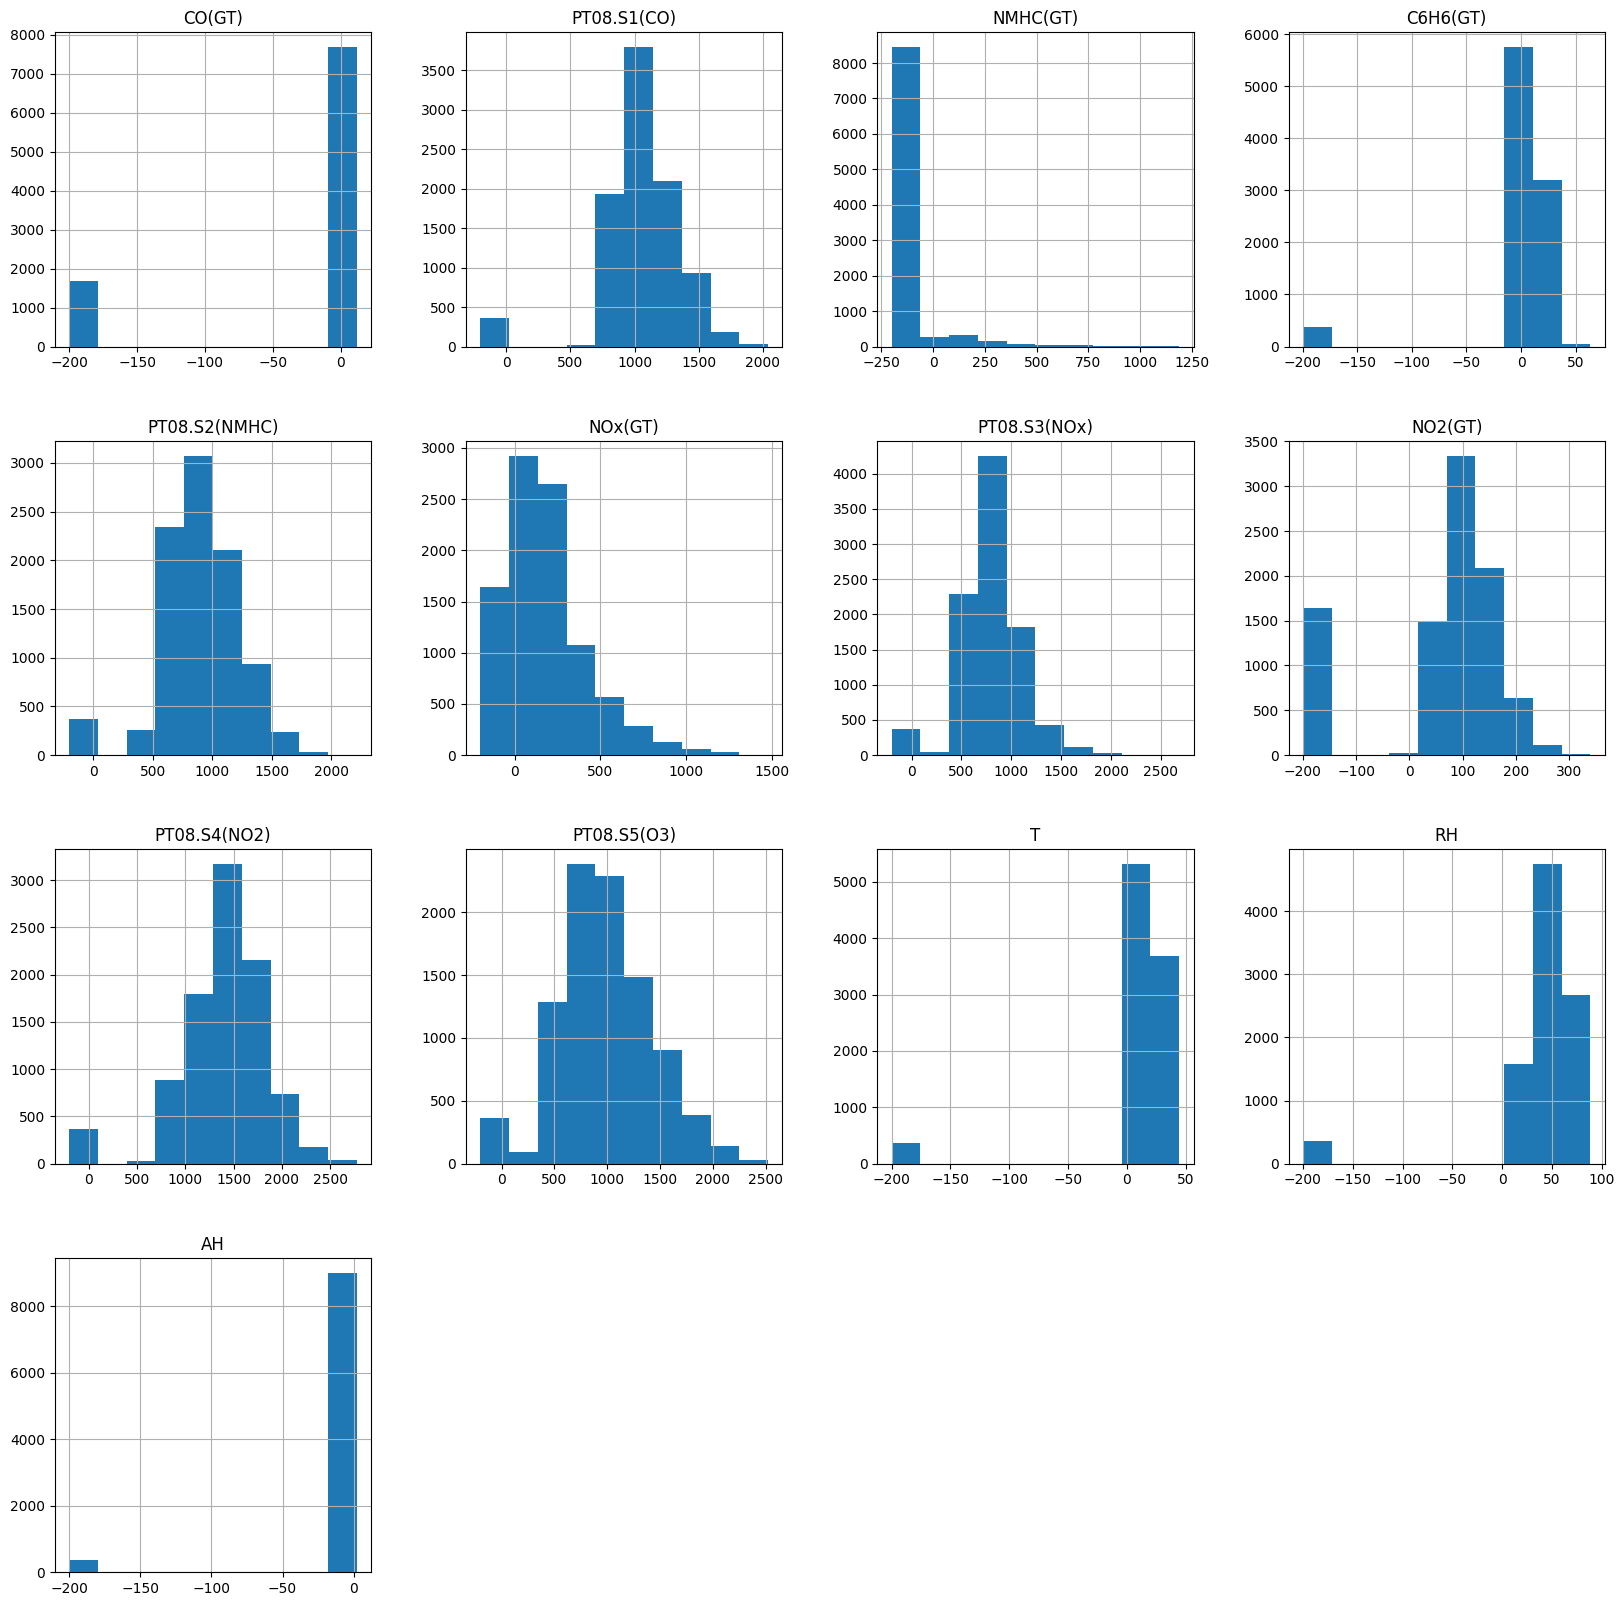

In [15]:
# Exploratory Data Analysis
# Plot histograms Untuk Setiap Fitur
data_cleaned.hist(figsize=(20, 20))
plt.show()

  **Penjelasan**

---


*   `data_cleaned.hist(figsize=(20, 20))`: Perintah ini membuat histogram untuk setiap kolom dalam DataFrame data_cleaned. Fungsi hist() dari pandas secara otomatis menghasilkan histogram untuk setiap fitur numerik dalam DataFrame.

*   `figsize=(20, 20)`: Parameter ini mengatur ukuran dari keseluruhan plot agar histogram yang dihasilkan tidak saling tumpang tindih dan lebih mudah dilihat. Dalam hal ini, ukuran figure diatur menjadi 20x20 inci.

*   `plt.show()`: Perintah ini menampilkan plot yang telah dibuat. Ini memastikan bahwa histogram yang dihasilkan ditampilkan di layar.

---
Dapat dilihat dari histogram ini memberikan gambaran visual tentang data yang tersebar, terlihat ada beberapa kolom yang memiliki nilai outliers yang cukup ekstrim.
Selanjutnya, histogram ini berfungsi untuk mendapatkan pemahaman awal tentang distribusi dan karakteristik data dalam dataset kualitas udara. Dengan visualisasi ini, kita dapat mengidentifikasi pola, anomali, dan fitur-fitur penting dalam data yang akan membantu analisis lebih lanjut seperti clustering.





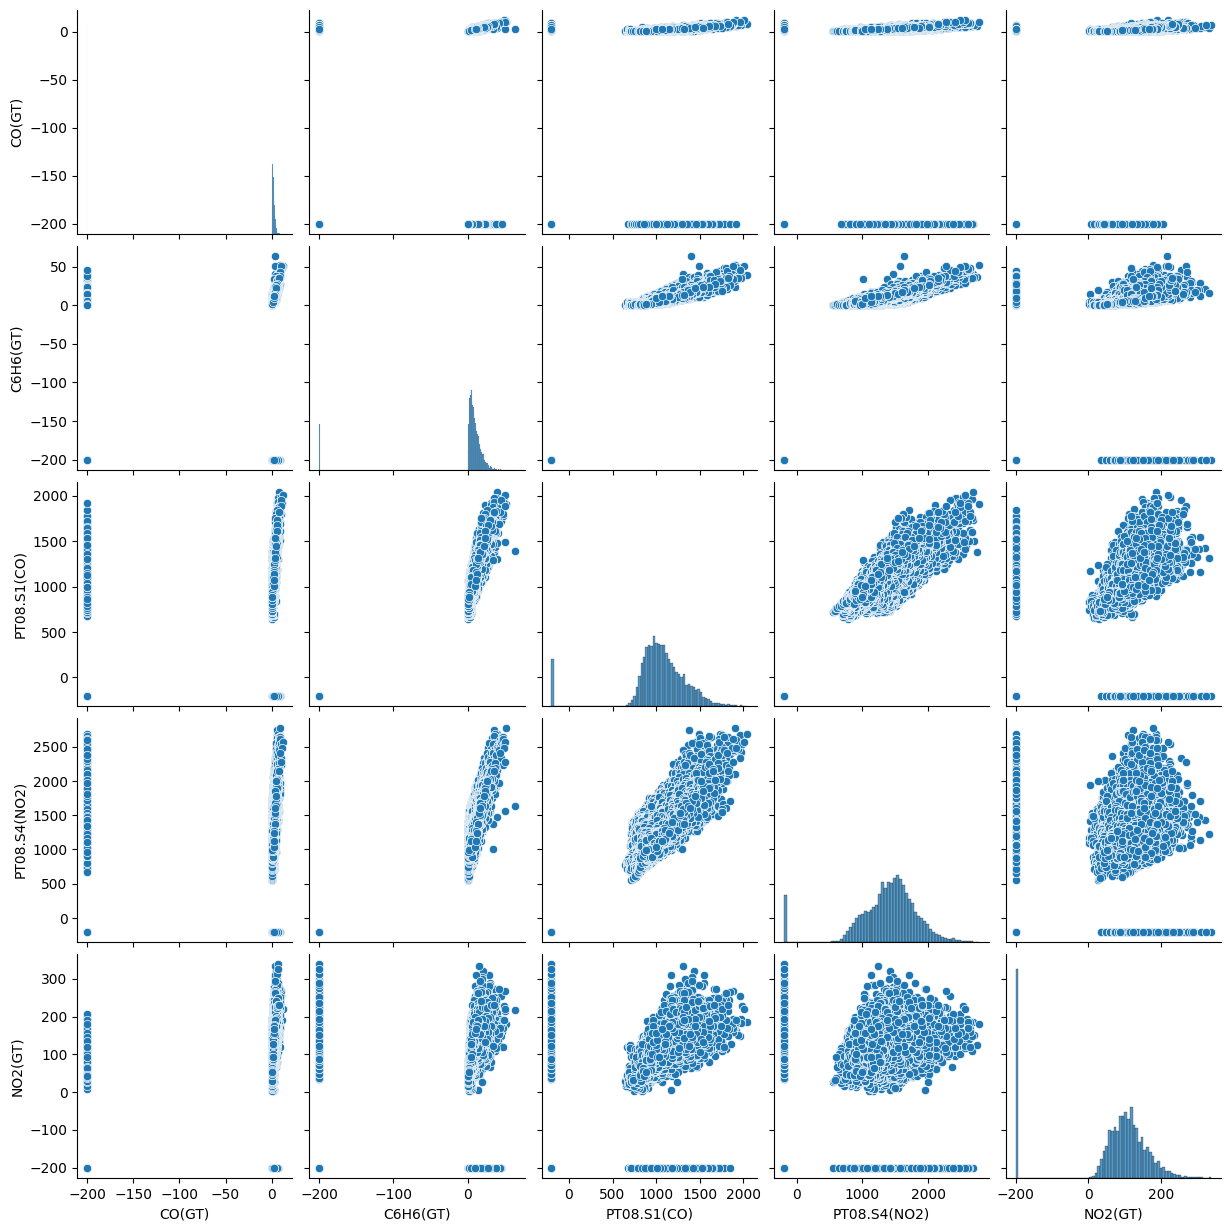

In [16]:
# Pairplot Untuk Subset Fitur
sns.pairplot(data_cleaned[['CO(GT)', 'C6H6(GT)', 'PT08.S1(CO)', 'PT08.S4(NO2)', 'NO2(GT)']])
plt.show()

**Penjelasan**

---

*   `sns.pairplot()`: Fungsi ini digunakan untuk membuat pairplot menggunakan library seaborn. Pairplot adalah sebuah grid dari scatter plots (dan histogram di diagonal) yang menunjukkan hubungan berpasangan antara fitur-fitur yang dipilih dalam dataset.
*   `data_cleaned[['CO(GT)', 'C6H6(GT)', 'PT08.S1(CO)', 'PT08.S4(NO2)', 'CO2(GT)]]`: Parameter ini menentukan subset dari fitur-fitur yang akan diplot. Di sini, dipilih fitur CO(GT), C6H6(GT), PT08.S1(CO), PT08.S4(NO2), dan CO2(GT).

*   `plt.show()`: Perintah ini digunakan untuk menampilkan pairplot yang telah dibuat.

---

Dalam pairplot diatas, kita bisa melihat korelasi dan pola.

 **Korelasi Positif** jika titik - titik dalam scatter plot membentuk garis diagonal yang naik dari kiri bawah ke kanan atas, ini menunjukkan korelasi positif. Misalnya, jika CO(GT) dan PT08.S1(CO) menunjukkan pola ini, berarti ketika CO meningkat, PT08.S1(CO) juga meningkat. Atau CO(GT) dan NO2(GT) juga menunjukkan pola ini.

**Korelasi Negatif**: Jika titik-titik membentuk garis diagonal yang turun dari kiri atas ke kanan bawah, ini menunjukkan korelasi negatif.

dan **Tidak Ada Korelasi**: Jika titik-titik tersebar secara acak tanpa pola yang jelas, ini menunjukkan tidak adanya korelasi yang kuat antara kedua fitur.


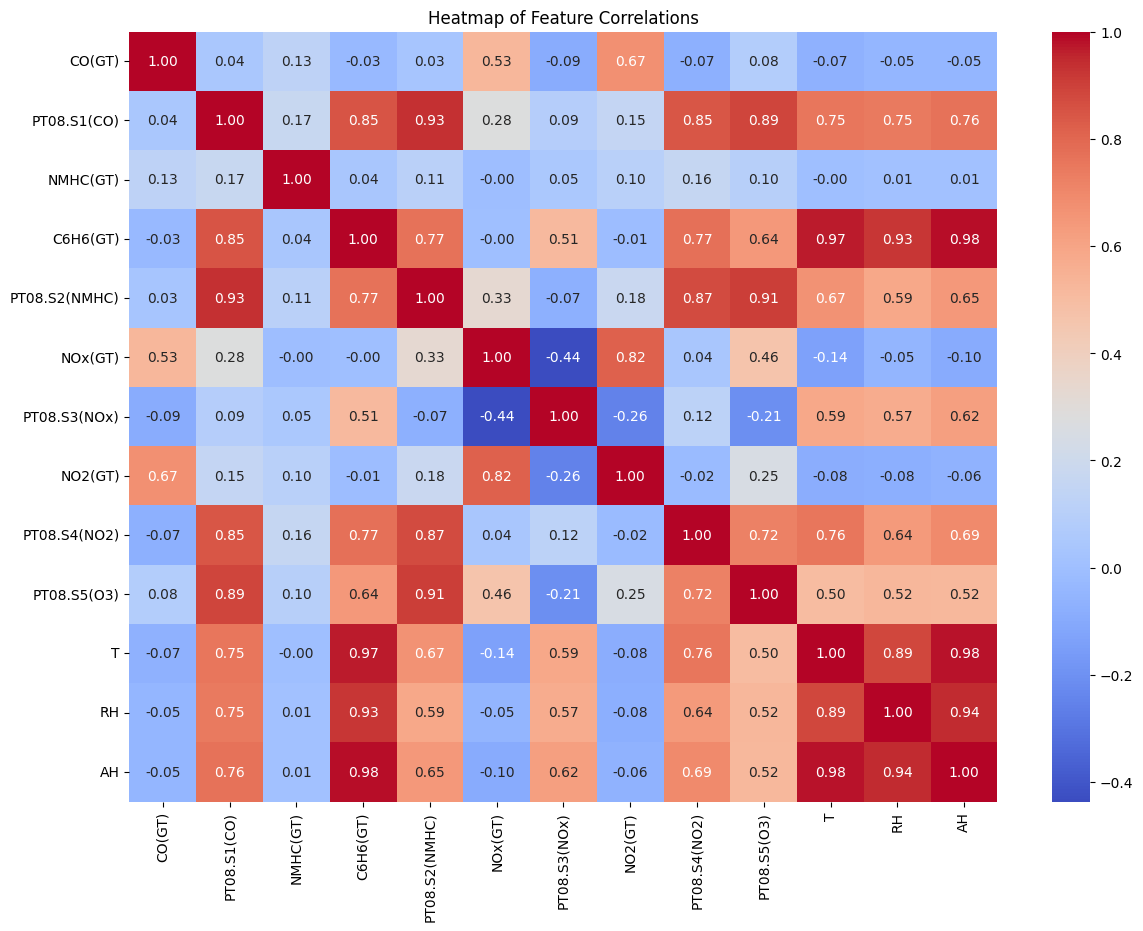

In [17]:
# Compute the correlation matrix and plot heatmap
corr_matrix = data_cleaned.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

**Penjelasan**

---

*   `data_cleaned.corr()`: Perintah ini menghitung matriks korelasi antara semua pasangan fitur dalam DataFrame data_cleaned. Matriks korelasi mengukur seberapa kuat hubungan linear antara dua variabel numerik. Nilai korelasi berkisar dari -1 hingga 1, di mana 1 menunjukkan korelasi positif sempurna, -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak adanya korelasi.
*   `plt.figure(figsize=(14, 10))`: Perintah ini mengatur ukuran gambar plot heatmap.
*   `sns.heatmap()`: Fungsi ini digunakan untuk membuat heatmap (peta panas) dari matriks korelasi. Heatmap adalah representasi visual yang sangat baik untuk memahami pola korelasi dalam data.
*   `corr_matrix`: Matriks korelasi yang dihasilkan sebelumnya.
* `annot=True`: Parameter ini menambahkan nilai-nilai korelasi ke dalam sel heatmap.
* `cmap='coolwarm'`: Parameter ini menentukan skema warna yang digunakan untuk heatmap. Di sini, 'coolwarm' digunakan untuk menunjukkan korelasi negatif dengan warna biru dan korelasi positif dengan warna merah.
* `fmt='.2f'`: Parameter ini menentukan format untuk menampilkan nilai korelasi dalam sel heatmap, di sini adalah dua angka desimal.
*  `plt.title('Heatmap of Feature Correlations')`: Memberikan judul untuk plot heatmap.
* `plt.show()`: Perintah ini menampilkan plot heatmap.

---
**Kesimpulan dari Heatmap Korelasi**

---


**Korelasi Positif**: Warna merah pada heatmap menunjukkan korelasi positif antara fitur. Semakin gelap warna merahnya, semakin kuat korelasinya.

**Korelasi Negatif**: Warna biru menunjukkan korelasi negatif antara fitur. Semakin gelap warna birunya, semakin kuat korelasinya.

**Tidak Ada Korelasi**: Warna netral (putih) menunjukkan tidak adanya korelasi antara fitur.

Kesimpulan dari heatmap, kita dapat melihat hubungan antara setiap pasangan fitur dalam dataset. Ini membantu kita untuk memahami bagaimana variabel-variabel saling berhubungan dan dapat digunakan dalam pemilihan fitur atau analisis lebih lanjut.







In [18]:
data_cleaned.isnull().sum()

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

**Penjelasan**

---
*   `data_cleaned.isnull().sum()`: digunakan untuk menghitung jumlah nilai null (NaN) dalam setiap kolom DataFrame `data_cleaned`.

Setiap nilai yang tidak valid atau hilang dalam dataset akan dihitung dan ditampilkan sebagai output. Jumlah nilai null dalam setiap kolom memberikan gambaran tentang seberapa banyak data yang tidak lengkap atau hilang dalam setiap fitur. Value diatas menunjukkan bahwa masih terdapat 114 data dari setiap fitur yang memiliki nilai kosong atau missing values. Hal ini menjadi perhatian khusus untuk di handle agar menghasilkan nilai yang bersih.

In [19]:
# Pengisian Nilai Hilang dengan Median dan Penggantian Nilai -200 dengan NaN
data_cleaned = data_cleaned.fillna(data_cleaned.median())
data_cleaned = data_cleaned.replace(-200, pd.NA)
data_cleaned = data_cleaned.fillna(data_cleaned.median())

**Penjelasan**

---


*   Langkah ini menggantikan nilai-nilai yang hilang (NaN) dalam DataFrame dengan nilai median dari masing-masing kolom. Penggunaan median biasanya lebih robust terhadap outlier dibandingkan dengan menggunakan mean. Metode `.fillna()` digunakan untuk mengganti nilai-nilai NaN dengan
nilai yang disediakan, dalam hal ini nilai median dari masing-masing kolom.
*   Selanjutnya, langkah ini mengganti nilai -200 dalam DataFrame `data_cleaned` dengan nilai NaN (Not a Number). Nilai -200 mungkin merepresentasikan nilai yang tidak valid atau tidak terukur.
Metode `.replace()` digunakan untuk mengganti semua kemunculan nilai -200 dengan nilai NaN menggunakan objek pd.NA yang merepresentasikan NaN dalam Pandas.
*   Langkah terakhir, yaitu bertujuan untuk memastikan bahwa nilai NaN yang dihasilkan setelah langkah penggantian dengan median diisi dengan nilai median lagi. Ini adalah langkah pencegahan tambahan untuk memastikan tidak ada nilai NaN yang tersisa dalam dataset setelah pemrosesan.

Sampai tahap ini, data yang telah diproses ini siap untuk digunakan dalam analisis lebih lanjut seperti pemodelan atau eksplorasi data lebih lanjut.

In [20]:
# Pastikan kembali dataset dengan menggunakan .info()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9471 non-null   float64
 1   PT08.S1(CO)    9471 non-null   float64
 2   NMHC(GT)       9471 non-null   float64
 3   C6H6(GT)       9471 non-null   float64
 4   PT08.S2(NMHC)  9471 non-null   float64
 5   NOx(GT)        9471 non-null   float64
 6   PT08.S3(NOx)   9471 non-null   float64
 7   NO2(GT)        9471 non-null   float64
 8   PT08.S4(NO2)   9471 non-null   float64
 9   PT08.S5(O3)    9471 non-null   float64
 10  T              9471 non-null   float64
 11  RH             9471 non-null   float64
 12  AH             9471 non-null   float64
dtypes: float64(13)
memory usage: 962.0 KB


In [21]:
data_cleaned.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

**Penjelasan**

---
Output diatas menjelaskan bahwa data sudah tidak terdapat missing values dan kolom yang dihapus, seperti date dan time pun sudah terhapus.


In [22]:
# Memilih dua fitur yang saling berhubungan: CO dan NO2
features = data_cleaned [['CO(GT)', 'NO2(GT)']]

**Penjelasan**

---


*   `data_cleaned[['CO(GT)', 'NO2(GT)']]` digunakan untuk memilih dua fitur dari DataFrame data_cleaned, yaitu `CO(GT)` (konsentrasi Karbon Monoksida) dan `NO2(GT)` (konsentrasi Nitrogen Dioksida).
---
Alasan Pemilihan 2 Atribut diatas karena fitur `CO(GT)` (Karbon Monoksida) dan `NO2(GT)` (Nitrogen Dioksida) adalah dua dari polutan udara yang paling umum dan berpotensi berdampak besar terhadap kualitas udara dan kesehatan manusia. Selain itu, konsentrasi Karbon Monoksida dan Nitrogen Dioksida dalam udara memiliki dampak yang signifikan terhadap kesehatan manusia. Paparan terhadap kedua polutan ini dapat menyebabkan berbagai masalah pernapasan, terutama pada kelompok rentan seperti anak-anak, lansia, dan individu dengan kondisi kesehatan yang sudah ada.





Koefisien Korelasi Pearson antara CO(GT) dan NO2(GT): 0.6577374700292676


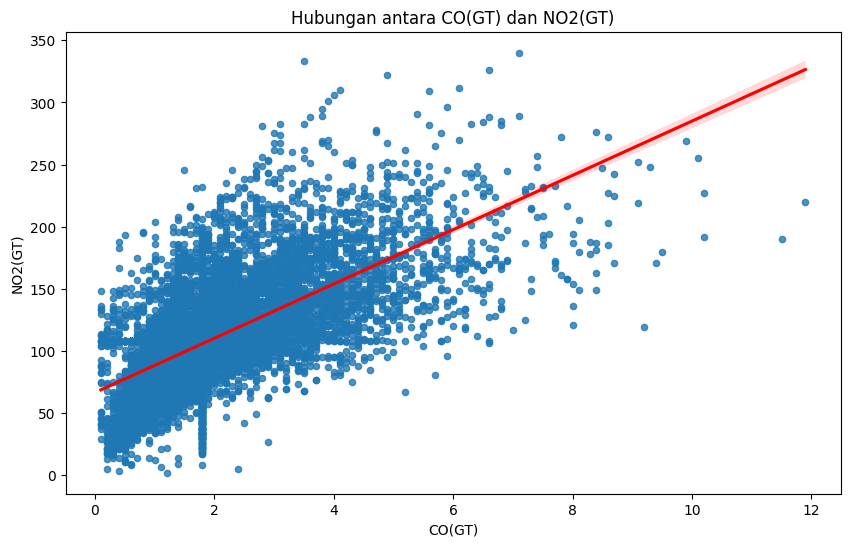

In [23]:
# Analisis korelasi antara CO(GT) dan NO2(GT)
correlation = features[['CO(GT)', 'NO2(GT)']].corr().iloc[0, 1]
print(f'Koefisien Korelasi Pearson antara CO(GT) dan NO2(GT): {correlation}')

# Visualisasi scatter plot dengan garis regresi
plt.figure(figsize=(10, 6))
sns.regplot(x='CO(GT)', y='NO2(GT)', data=features, scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title('Hubungan antara CO(GT) dan NO2(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('NO2(GT)')
plt.show()

**Penjelasan Analisis korelasi antara CO(GT) dan NO2(GT)**

---

*   `features[['CO(GT)', 'NO2(GT)']].corr()`: Perintah ini menghitung matriks korelasi Pearson untuk dua kolom yang dipilih (CO(GT) dan NO2(GT)). Korelasi Pearson mengukur kekuatan dan arah hubungan linear antara dua variabel.
*   `.iloc[0, 1]`: Perintah ini mengambil nilai korelasi dari matriks korelasi yang dihasilkan. iloc[0, 1] berarti mengambil nilai dari baris pertama dan kolom kedua dari matriks.
*   `print(f'Koefisien Korelasi Pearson antara CO(GT) dan NO2(GT): {correlation}')`: Menampilkan koefisien korelasi Pearson antara CO(GT) dan NO2(GT).


---

**Penjelasan Visualisasi scatter plot dengan garis regresi**

---

*   `plt.figure(figsize=(10, 6))`: Mengatur ukuran gambar plot scatter.
*   `sns.regplot(x='CO(GT)', y='NO2(GT)', data=features, scatter_kws={'s':20}, line_kws={'color':'red'})`: Membuat scatter plot dari dua fitur CO(GT) dan NO2(GT) serta menambahkan garis regresi linear.
*   `x='CO(GT)' dan y='NO2(GT)'`: Menentukan sumbu x dan y untuk plot.
* `data=features`: Menentukan DataFrame yang digunakan untuk plot.
*   `scatter_kws={'s':20}`: Mengatur ukuran titik-titik dalam scatter plot.
*   `line_kws={'color':'red'}`: Mengatur warna garis regresi menjadi merah.
*   `plt.title('Hubungan antara CO(GT) dan NO2(GT)')`: Menambahkan judul untuk plot.
*   `plt.xlabel('CO(GT)') dan plt.ylabel('NO2(GT)')`: Menambahkan label untuk sumbu x dan y.
*   `plt.show()`: Menampilkan scatter plot dengan garis regresi.

---
**Penjelasan**

---
Analisis diatas menunjukkan, korelasi pearson antara `CO(GT)` dan `NO2(GT)` hasilnya adalah **0.6577374700292676**, itu artinya terdapat hubungan **positif yang kuat** antara dua variabel ini. Hal ini dilakukan untuk memberi kepastian bahwa kedua hubungan ini memang positif kuat selain menggunakan heatmap.

Selanjutnya, Scatter plot dengan garis regresi membantu untuk memvisualisasikan hubungan linear antara CO(GT) dan NO2(GT). Garis regresi yang dihasilkan diatas menunjukkan tren umum miring ke atas, ini menunjukkan korelasi positif, artinya (ketika CO(GT) meningkat, NO2(GT) juga cenderung meningkat). Kemudian, plot ini juga membantu mengidentifikasi outliers atau poin data yang tidak sesuai dengan tren umum.

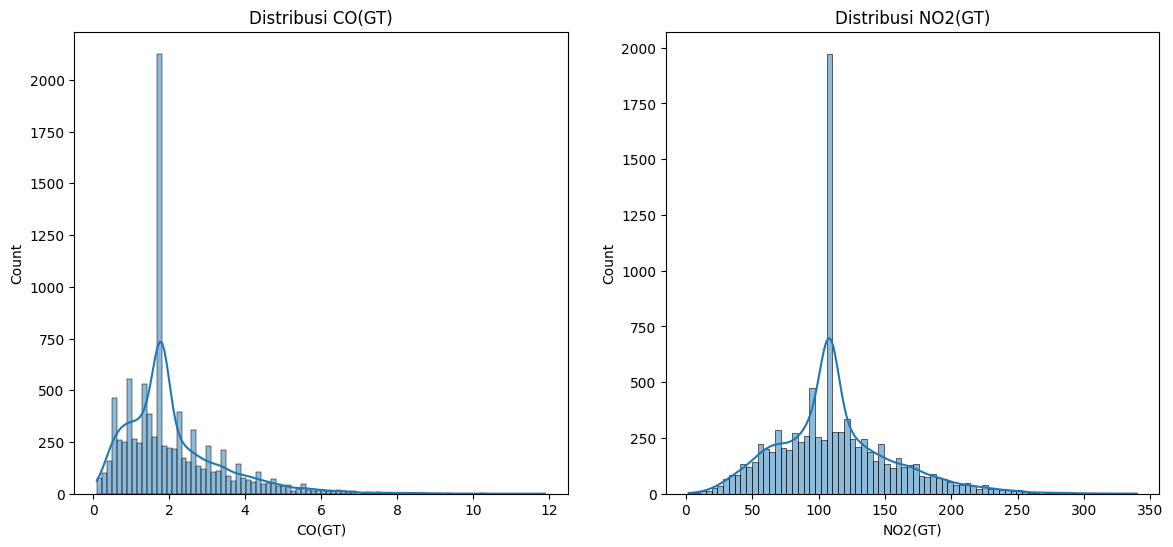

<Axes: xlabel='NO2(GT)'>

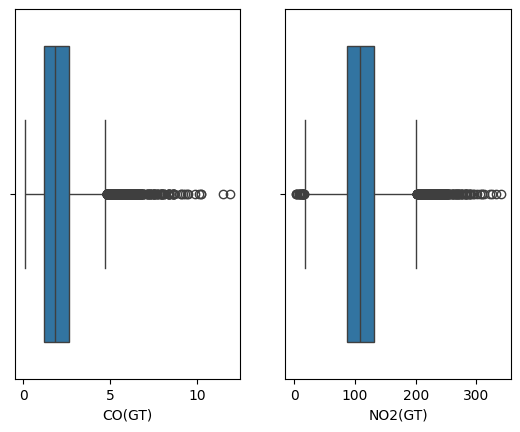

In [24]:
# EDA Univariat
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(features['CO(GT)'], kde=True)
plt.title('Distribusi CO(GT)')

plt.subplot(1, 2, 2)
sns.histplot(features['NO2(GT)'], kde=True)
plt.title('Distribusi NO2(GT)')
plt.show()

# Membuat boxplot sebelum penghapusan outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=features['CO(GT)'])

plt.subplot(1, 2, 2)
sns.boxplot(x=features['NO2(GT)'])

**Penjelasan Analisis Data Eksplorasi (EDA) Univariat**

---

*   `plt.figure(figsize=(14, 6))`: Mengatur ukuran figur dengan lebar 14 inci dan tinggi 6 inci.
*  `plt.subplot(1, 2, 1)`: Membuat subplot pertama dalam posisi 1 dari 2 subplot dalam satu baris.
*   `sns.histplot(features['CO(GT)'], kde=True)`: Membuat histogram untuk fitur CO(GT) dengan Kernel Density Estimate (KDE) untuk menunjukkan distribusi data secara lebih halus.
*  `plt.title('Distribusi CO(GT)')`: Menambahkan judul untuk subplot pertama.
*   `plt.subplot(1, 2, 2)`: Membuat subplot kedua dalam posisi 2 dari 2 subplot dalam satu baris.
*   `sns.histplot(features['NO2(GT)'], kde=True)`: Membuat histogram untuk fitur NO2(GT) dengan KDE untuk menunjukkan distribusi data secara lebih halus.
*   `plt.title('Distribusi NO2(GT)')`: Menambahkan judul untuk subplot kedua.
* `plt.show()`: Menampilkan kedua subplot dalam satu figur.

---

**Penjelasan Membuat Bloxplot**

---

*   `plt.subplot(1, 2, 1)`: Membuat subplot pertama dalam posisi 1 dari 2 subplot dalam satu baris.
*   `sns.boxplot(x=features['CO(GT)'])`: Membuat boxplot untuk fitur `CO(GT)` untuk memvisualisasikan distribusi dan mendeteksi outliers.
*   `plt.subplot(1, 2, 2)`: Membuat subplot kedua dalam posisi 2 dari 2 subplot dalam satu baris.
* `sns.boxplot(x=features['NO2(GT)'])`: Membuat boxplot untuk fitur `NO2(GT)` untuk memvisualisasikan distribusi dan mendeteksi outliers.

---
**Penjelasan**

---
Histogram diatas memberikan gambaran tentang distribusi frekuensi dan probabilitas dari data Karbon Monoksida dan Nitrogen Dioksida. Garis KDE membantu mengidentifikasi bentuk distribusinya (apakah itu normal, skewed, atau bimodal).
Selanjutnya, untuk boxplot berguna untuk mengidentifikasi outliers yang dapat memengaruhi analisis statistik dan Machine Learning.

Dari gambar diatas, bisa dilihat bahwa fitur cenderung skewed dan terdapat banyak titik outliers diluar garis whisker.










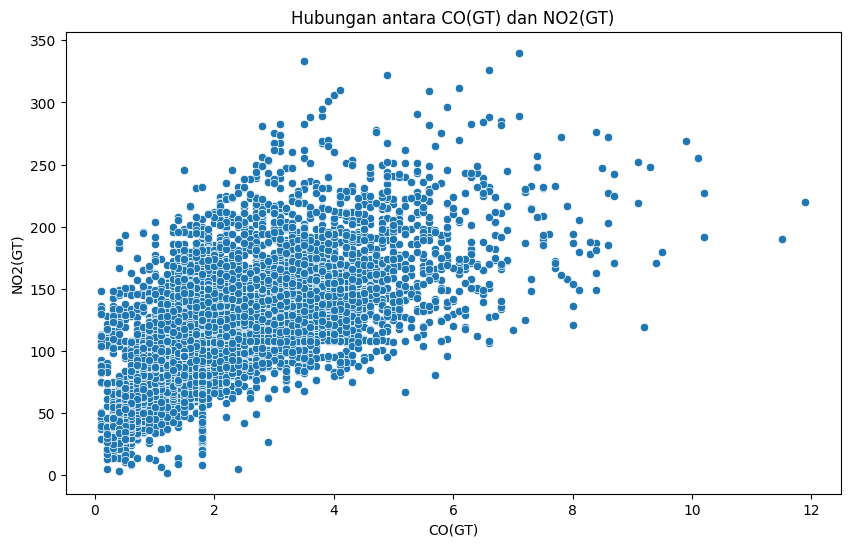

In [25]:
# EDA Bivariat
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CO(GT)', y='NO2(GT)', data=features)
plt.title('Hubungan antara CO(GT) dan NO2(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('NO2(GT)')
plt.show()


**Penjelasan EDA Bivariat**

---


* `plt.figure(figsize=(10, 6))`: Membuat kanvas gambar dengan ukuran 10 inci lebar dan 6 inci tinggi untuk menampung scatter plot.
* `sns.scatterplot(x='CO(GT)', y='NO2(GT)', data=features)`: Membuat scatter plot dari dua fitur `CO(GT)` dan `NO2(GT)`.
* `x='CO(GT)'`: Menentukan fitur `CO(GT)` sebagai sumbu x.
* `y='NO2(GT)'`: Menentukan fitur `NO2(GT)` sebagai sumbu y.
*  `data=features`: Menentukan DataFrame yang digunakan untuk plot, yaitu features yang berisi kolom `CO(GT)` dan `NO2(GT)`.
* `plt.title('Hubungan antara CO(GT) dan NO2(GT)')`: Menambahkan judul pada scatter plot.
* `plt.xlabel('CO(GT)')`: Menambahkan label untuk sumbu x.
* `plt.ylabel('NO2(GT)')`: Menambahkan label untuk sumbu y.
* `plt.show()`: Menampilkan scatter plot.
---
**Penjelasan**

---
Exploratory Data Analysis (EDA) bivariat bertujuan untuk menganalisis hubungan antara dua variabel dalam dataset. Dalam hal ini, kita menganalisis hubungan antara dua fitur: CO(GT) dan NO2(GT). Dari hasil diatas dapat disimpulkan bahwa scatter plot menunjukkan korelasi positif antara dua variabel tersebut dengan ditandai dari: titik - titik yang cenderung membentuk garis miring ke atas.






In [26]:
# Menangani outlier menggunakan IQR
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1


In [27]:
# Menghapus outlier
features = features[~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)]

**Penjelasan Handling Outliers**

---
* `Q1`: Kuartil pertama (25th percentile) dari setiap fitur di features. Kuartil pertama adalah nilai di mana 25% data berada di bawahnya.
* `Q3`: Kuartil ketiga (75th percentile) dari setiap fitur di features. Kuartil ketiga adalah nilai di mana 75% data berada di bawahnya.
* `IQR`: Interquartile Range, yaitu selisih antara kuartil ketiga dan kuartil pertama (Q3 - Q1). IQR digunakan untuk mengukur sebaran tengah 50% data dan merupakan metrik yang berguna untuk mendeteksi outliers.
* `features < (Q1 - 1.5 * IQR)`: Mengidentifikasi data yang berada di bawah batas bawah (Q1 - 1.5 * IQR).
* `features > (Q3 + 1.5 * IQR)`: Mengidentifikasi data yang berada di atas batas atas (Q3 + 1.5 * IQR).
* `|`: Operator "or" untuk menggabungkan kondisi outlier di bawah batas bawah dan di atas batas atas.
* `any(axis=1)`: Mengaplikasikan kondisi di atas untuk setiap baris. Jika ada fitur dalam suatu baris yang merupakan outlier, kondisi ini akan menjadi True.
* `~()`: Operator "not" untuk membalikkan kondisi. Dengan ini, kita hanya memilih baris yang bukan outlier.
* `features[~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)]`: Memfilter DataFrame features untuk menyertakan hanya baris yang bukan outliers.

**Penjelasan**

---

Langkah diatas adalah step untuk handling outliers. Dengan menangani outliers menggunakan metode IQR, kita memastikan bahwa data yang digunakan untuk analisis lebih lanjut adalah data yang bersih dan representatif.


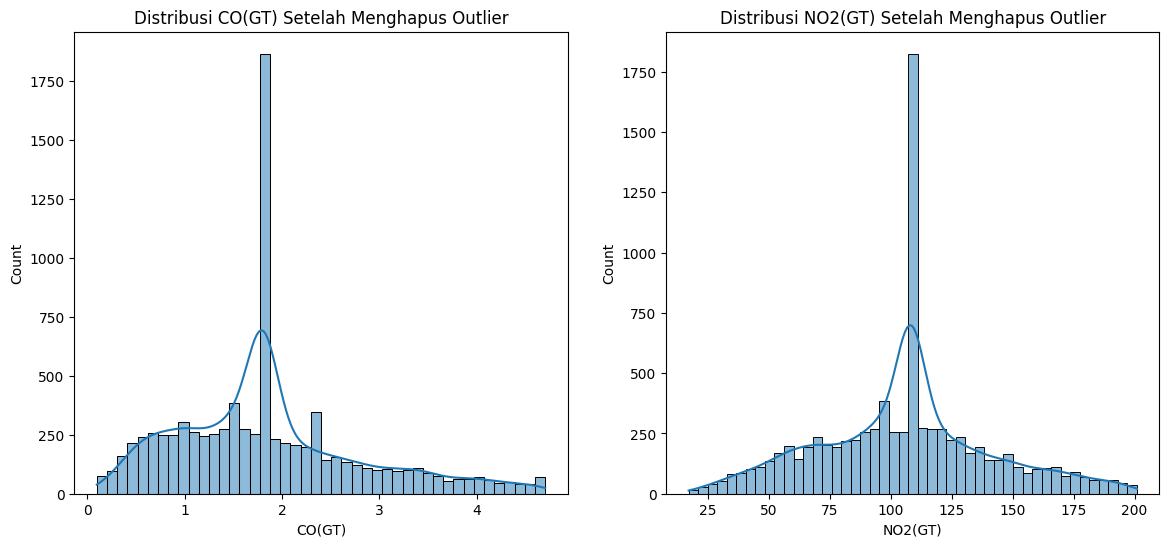

<Axes: xlabel='NO2(GT)'>

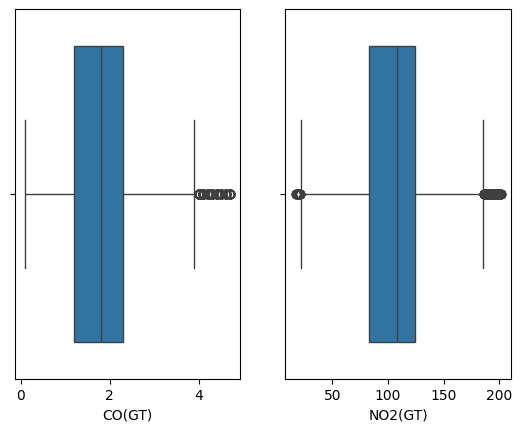

In [28]:
# EDA setelah menghapus outlier
# EDA Univariat setelah menghapus outlier
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(features['CO(GT)'], kde=True)
plt.title('Distribusi CO(GT) Setelah Menghapus Outlier')

plt.subplot(1, 2, 2)
sns.histplot(features['NO2(GT)'], kde=True)
plt.title('Distribusi NO2(GT) Setelah Menghapus Outlier')
plt.show()

# Membuat boxplot setelah penghapusan outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=features['CO(GT)'])

plt.subplot(1, 2, 2)
sns.boxplot(x=features['NO2(GT)'])



**Penjelasan**

---
Dari hasil output diatas, beberapa outliers ekstrim dapat dihandle dengan baik, dan outliers sisanya tetap dipertahankan untuk kepentingan clustering.


# **Pemodelan Data Mining (KMeans)**

In [29]:
# Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features[['CO(GT)', 'NO2(GT)']])

**Penjelasan**

---


*   `StandardScaler`: Library dari scikit-learn yang digunakan untuk menstandarisasi fitur-fitur dalam dataset. StandardScaler mengubah data sehingga memiliki mean = 0 dan standar deviasi = 1.
*   `scaler = StandardScaler()`:Membuat instance dari StandardScaler.
* `fit_transform()`: Menggabungkan dua langkah utama, yaitu `fit()` dan `transform()`
* `fit()`: Menghitung mean dan standar deviasi dari fitur yang diberikan.
* `transform()`: Mengubah data berdasarkan mean dan standar deviasi yang dihitung sehingga data memiliki mean = 0 dan standar deviasi = 1.
* `features[['CO(GT)', 'NO2(GT)']]`: Memilih kolom CO(GT) dan NO2(GT) dari DataFrame features untuk distandarisasi.

Menggunakan StandardScaler untuk mentransformasikan data `CO(GT)` dan `NO2(GT)` sehingga keduanya memiliki mean 0 dan standar deviasi 1. Hal ini memastikan untuk mengurangi pengaruh fitur dengan rentang nilai yang lebih besar.


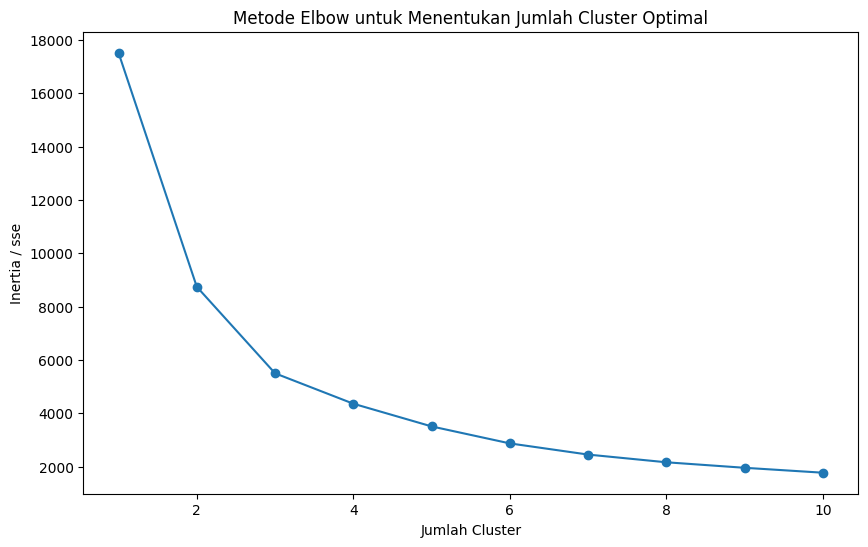

In [30]:
# Metode Elbow untuk menentukan jumlah cluster yang optimal
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia / sse')
plt.show()

**Penjelasan**

---


*   `sse=[]`: List kosong untuk menyimpan nilai inertia (sum of squared errors) untuk setiap jumlah cluster yang diuji.
*   `k_range`: Rentang nilai untuk jumlah cluster yang akan diuji, dalam hal ini dari 1 hingga 10.
* `for k in k_range`: Loop untuk setiap nilai k dalam rentang 1 hingga 10.
* `KMeans(n_clusters=k, random_state=42, n_init=10)`: Menginisialisasi algoritma KMeans dengan k cluster, seed acak (random_state) untuk konsistensi hasil, dan n_init=10 (jumlah kali inisialisasi ulang dengan centroid berbeda untuk menghindari local minimum).
* `kmeans.fit(features_scaled)`: Melatih model KMeans pada data yang telah distandarisasi.
* `sse.append(kmeans.inertia_)`: Menyimpan nilai inertia (jumlah kesalahan kuadrat dalam cluster) ke dalam list sse.
* `plt.figure(figsize=(10, 6))`: Membuat kanvas gambar dengan ukuran 10 inci lebar dan 6 inci tinggi.
* `plt.plot(k_range, sse, marker='o')`: Membuat plot garis antara jumlah cluster (k) dan inertia, dengan marker 'o' untuk menunjukkan titik data.
* `plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')`: Menambahkan judul pada plot.
* `plt.xlabel('Jumlah Cluster')`: Menambahkan label pada sumbu x untuk menunjukkan jumlah cluster.
* `plt.ylabel('Inertia / SSE')`: Menambahkan label pada sumbu y untuk menunjukkan nilai inertia (SSE).
* `plt.show()`: Menampilkan plot.

Hasil cluster optimal dari metode elbow diatas adalah 3, kenapa 3? karena dilihat dari titik di mana kurva mulai mendatar. Dengan menggunakan metode elbow, kita dapat menentukan jumlah cluster yang optimal secara visual, yang penting untuk memastikan bahwa data kita dikelompokkan dengan baik tanpa menambahkan kompleksitas yang tidak perlu.

In [31]:
# Melakukan clustering menggunakan KMeans dengan jumlah cluster optimal (misal 3)
optimal_clusters = 3  # Sesuaikan dengan hasil dari metode elbow
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10).fit(features_scaled)

In [32]:
# Menambahkan kolom hasil cluster ke dataset
features['Cluster'] = kmeans.labels_

**Penjelasan**

---
* `optimal_clusters`: Jumlah cluster yang optimal berdasarkan hasil dari metode elbow. Misalnya, jika dari plot elbow terlihat bahwa 3 adalah jumlah cluster optimal, maka kita menetapkan `optimal_clusters = 3`.
* `KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)`: Membuat instance dari algoritma KMeans dengan jumlah cluster yang optimal `(optimal_clusters)`, seed acak untuk konsistensi hasil `(random_state=42)`, dan `n_init=10` untuk melakukan inisialisasi ulang sebanyak 10 kali guna menghindari local minimum.
* `.fit(features_scaled)`: Melatih model KMeans pada data yang telah distandarisasi `(features_scaled)`. Ini akan menghitung posisi centroid dari cluster dan menetapkan setiap titik data ke cluster terdekat.
* `features['Cluster']`: Menambahkan kolom baru ke DataFrame features dengan nama 'Cluster'.
* `kmeans.labels_`: Atribut dari objek KMeans yang berisi label cluster untuk setiap titik data. Label ini menunjukkan cluster mana setiap titik data ditempatkan.

---
Dengan melakukan clustering menggunakan KMeans dan menambahkan hasil cluster ke dataset, kita telah mengelompokkan data berdasarkan fitur-fitur yang ada. Hal ini memungkinkan kita untuk mengidentifikasi pola dan karakteristik dalam data yang mungkin tidak terlihat sebelumnya.


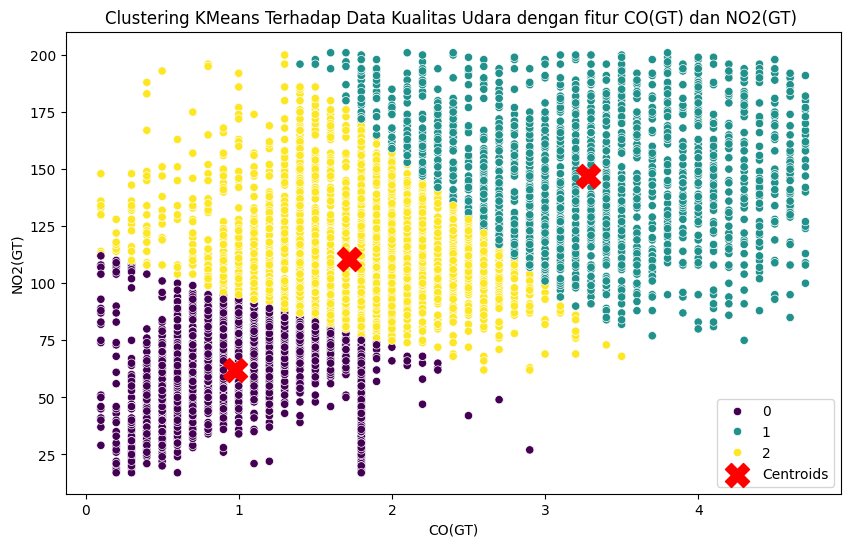

In [33]:
# EDA Multivariat dengan cluster dan menambahkan centroid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['CO(GT)'], y=features['NO2(GT)'], hue=features['Cluster'], palette='viridis')
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            s=300, c='red', label='Centroids', marker='X')
plt.title('Clustering KMeans Terhadap Data Kualitas Udara dengan fitur CO(GT) dan NO2(GT) ')
plt.xlabel('CO(GT)')
plt.ylabel('NO2(GT)')
plt.legend()
plt.show()

**Penjelasan**


---
* `plt.figure(figsize=(10, 6))`: Membuat kanvas gambar dengan ukuran 10 inci lebar dan 6 inci tinggi untuk menampung plot yang akan dibuat.
* `sns.scatterplot(...)`: Membuat scatter plot dari data.
* `x=features['CO(GT)']`: Menggunakan CO(GT) sebagai sumbu x.
* `y=features['NO2(GT)']`: Menggunakan NO2(GT) sebagai sumbu y.
* `hue=features['Cluster']`: Mewarnai titik-titik data berdasarkan nilai cluster yang telah ditentukan sebelumnya.
* `palette='viridis'`: Menggunakan palet warna 'viridis' untuk membedakan cluster.
* `plt.scatter(...)`: Menambahkan scatter plot untuk centroid cluster.
* `scaler.inverse_transform(kmeans.cluster_centers_)[:, 0]`: Mengambil koordinat x dari centroid setelah mengembalikan data ke skala aslinya.
* `scaler.inverse_transform(kmeans.cluster_centers_)[:, 1]`: Mengambil koordinat y dari centroid setelah mengembalikan data ke skala aslinya.
* `s=300`: Mengatur ukuran titik centroid.
* `c='red'`: Mengatur warna titik centroid menjadi merah.
* `label='Centroids'`: Menambahkan label 'Centroids' untuk titik centroid.
* `marker='X'`: Menggunakan simbol 'X' untuk menandai centroid.
* `plt.title(...)`: Menambahkan judul pada plot.
* `plt.xlabel('CO(GT)')`: Menambahkan label pada sumbu x.
* `plt.ylabel('NO2(GT)')`: Menambahkan label pada sumbu y.
* `plt.legend()`: Menampilkan legenda untuk plot, termasuk label 'Centroids'.
* `plt.show()`: Menampilkan plot yang telah dibuat.


---

Visualisasi clustering dengan scatter plot yang menunjukkan data berdasarkan fitur CO(GT) dan NO2(GT) dan menambahkan centroid memberikan gambaran yang jelas tentang struktur data dan efektivitas proses clustering. Ini adalah langkah penting dalam analisis data untuk memahami pola dan hubungan dalam data, serta untuk mengidentifikasi apakah clustering sudah memisahkan data dengan baik. Dengan visualisasi ini, kita dapat melihat distribusi data dalam setiap cluster dan memahami posisi relatif dari setiap cluster dan centroidnya.

In [34]:
# Evaluasi clustering menggunakan Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(features_scaled, kmeans.labels_)

print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

Davies-Bouldin Index: 0.784070450932941


Evaluasi clustering menggunakan Davies-Bouldin Index memberikan wawasan tentang seberapa baik data telah dikelompokkan oleh algoritma KMeans. DBI adalah metrik yang berguna untuk mengukur keseragaman dan pemisahan cluster. Dengan nilai DBI yang lebih rendah, kita dapat menyimpulkan bahwa clustering telah mencapai pemisahan cluster yang baik dan setiap cluster cukup kompak. Sebaliknya, nilai DBI yang lebih tinggi akan menunjukkan bahwa clustering mungkin perlu dioptimalkan lebih lanjut, misalnya dengan mencoba jumlah cluster yang berbeda atau menggunakan metode clustering yang berbeda.